Importing Necessary Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image, display
%matplotlib inline

Mounting into Google Drive, Where the images are stored

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Since images are stored diffrent folder with there labels, split folder used to divide train, valid and test accordingly. 

In [8]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Median blur is used Used to remove noice over the image.
Kind of Salt and pepper noise on the image,


Pre Proceesing of Desert Images 

In [9]:
path = "/content/drive/MyDrive/INtern/data/desert"

output_path = "/content/drive/MyDrive/corrections/desert/"

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))

    blurred = cv2.medianBlur(img, 5)

    lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)   #use of lab color space, l states for lighter, a,b green,red and yellow and blue combination.
    l, a, b = cv2.split(lab)                         #
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8)) #contrast limited adaptive histogram equalization
    l_eq = clahe.apply(l)
    lab_eq = cv2.merge((l_eq, a, b))
    img_eq = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    min_val = np.min(img_eq)                          
    max_val = np.max(img_eq)
    img_stretched = (img_eq - min_val) * 255.0 / (max_val - min_val)    ## Scale the pixel values to the full dynamic range of the image
    img_stretched = np.uint8(img_stretched)

    cv2.imwrite(os.path.join(output_path, filename), img_stretched)


Pre Proceesing of Cloud Images

In [10]:
import cv2
import os

path = "/content/drive/MyDrive/INtern/data/cloudy"

output_path = "/content/drive/MyDrive/corrections/cloudy/"

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    blurred = cv2.medianBlur(img, 5)



    lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8)) 
    l_eq = clahe.apply(l)
    lab_eq = cv2.merge((l_eq, a, b))
    img_eq = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    cv2.imwrite(os.path.join(output_path, filename), img_eq)


Pre Proceesing of Green area Images

In [11]:
path = "/content/drive/MyDrive/INtern/data/green_area"

output_path = "/content/drive/MyDrive/corrections/green_area/"

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))

    blurred = cv2.medianBlur(img, 5)

    lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8)) 
    l_eq = clahe.apply(l)
    lab_eq = cv2.merge((l_eq, a, b))
    img_eq = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    min_val = np.min(img_eq)
    max_val = np.max(img_eq)
    img_stretched = (img_eq - min_val) * 255.0 / (max_val - min_val)
    img_stretched = np.uint8(img_stretched)

    cv2.imwrite(os.path.join(output_path, filename), img_stretched)


Pre Proceesing of Water Images

In [12]:
path = "/content/drive/MyDrive/INtern/data/water"

output_path = "/content/drive/MyDrive/corrections/water/"

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))

    blurred = cv2.medianBlur(img, 5)

    lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8)) 
    l_eq = clahe.apply(l)
    lab_eq = cv2.merge((l_eq, a, b))
    img_eq = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    min_val = np.min(img_eq)
    max_val = np.max(img_eq)
    img_stretched = (img_eq - min_val) * 255.0 / (max_val - min_val)
    img_stretched = np.uint8(img_stretched)

    cv2.imwrite(os.path.join(output_path, filename), img_stretched)

Splitting the data set into 


*   Train data set (70% of images) around 3941 Images
*   Validation set (15% of images) around 845 Images
*   Test Set (15% of images) around 845 Images






In [16]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/INtern/data", output = "data_split1", seed=1337, move = False, ratio = (0.7,0.15,0.15), group_prefix=None)

Copying files: 5631 files [00:21, 257.33 files/s]


Assigning the path of train, test and validation to a variable

In [17]:
train_path = r'/content/data_split1/train'
val_path = r'/content/data_split1/val'
test_path = r'/content/data_split1/test'

Image Data generator 


In [23]:
from keras.preprocessing.image import ImageDataGenerator

#Data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.2,1.0]
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Generate augmented training data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'
)

Found 3941 images belonging to 4 classes.
Found 844 images belonging to 4 classes.
Found 846 images belonging to 4 classes.


Checking the classes of Image at different folder 

In [24]:
classes = train_generator.class_indices
classes

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

Checking the labels

In [25]:
labels = []
for key, value in classes.items():
    labels.append(key)

In [26]:
labels

['cloudy', 'desert', 'green_area', 'water']

Separating Images and labels 

In [28]:
X_train, y_train = next(train_generator)
X_val, y_val = next(validation_generator)
X_test, y_test = next(test_generator)

Displaying some images of train dataset

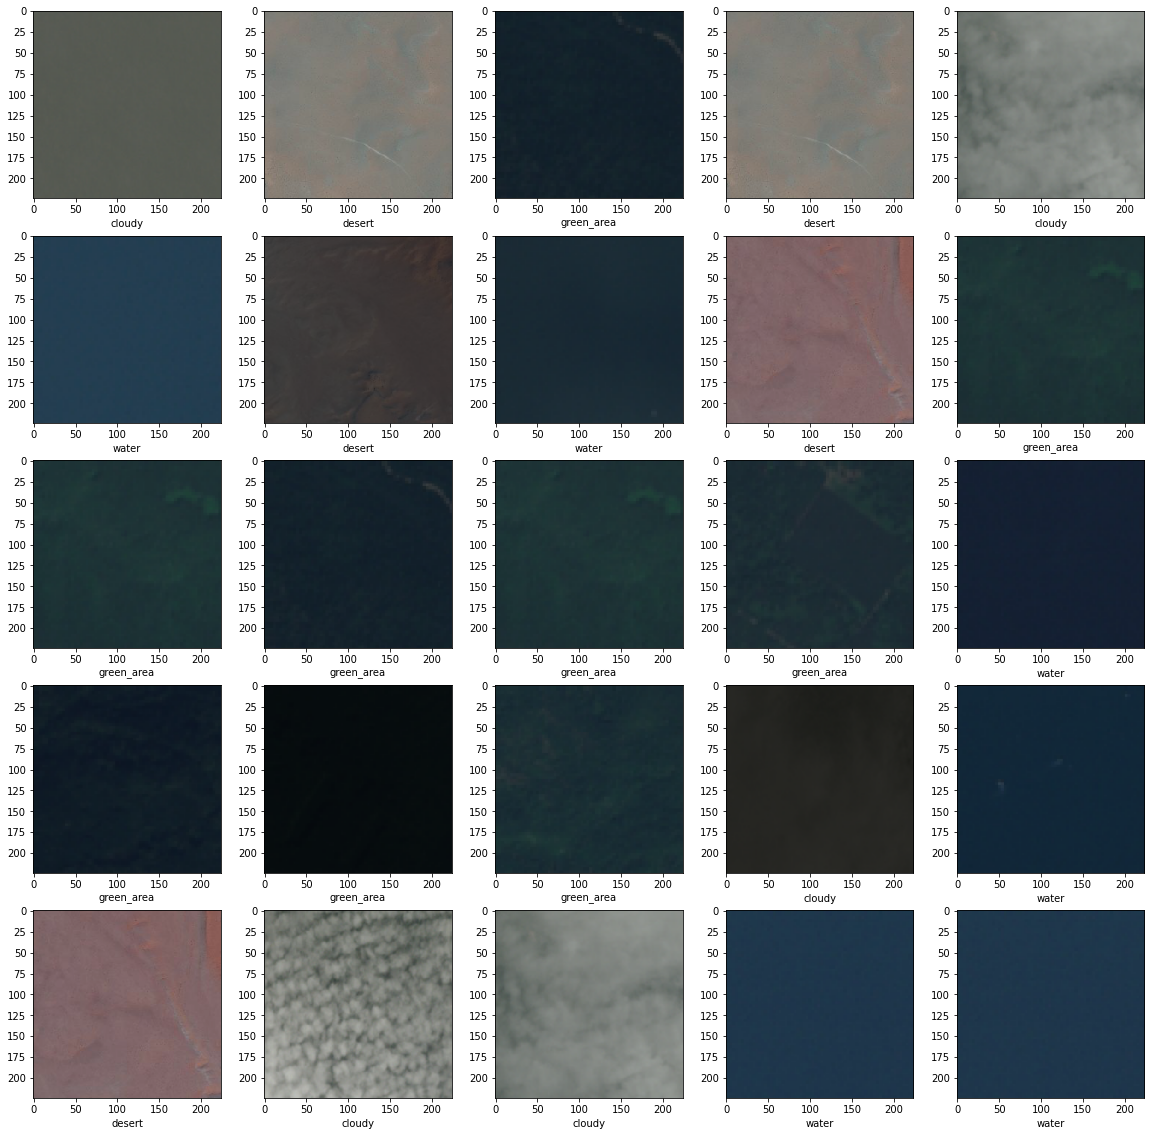

In [29]:
plt.figure(figsize=(20,20))
for n, i in enumerate(np.random.randint(0, len(X_train), 25)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_train[i]*255).astype(np.uint8))
    plt.xlabel(labels[np.argmax(y_train[i])])
